In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

project_path = '/content/drive/MyDrive/customer_churn_analysis'
os.makedirs(project_path, exist_ok = True)
os.makedirs(f'{project_path}/data', exist_ok = True)
os.makedirs(f'{project_path}/images', exist_ok = True)
os.makedirs(f'{project_path}/notebooks', exist_ok = True)

print("Project folder created!")

Project folder created!


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/customer_churn_analysis/data/Telco-Customer-Churn.csv')
print(f'Loaded {df.shape[0]} rows, {df.shape[1]} columns')
df.head()

Loaded 7043 rows, 24 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,NaN,NaN
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,NaN,Average Churned Customers,17.979133
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN,Average Retained Customers,37.569965
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN,Retention Rate,73.452584


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'], axis = 1, inplace = True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

print(f'Missing TotalCharges : {df['TotalCharges'].isnull().sum()}')
df.dropna(subset = ['TotalCharges'], inplace = True)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No' : 0})

print("Data Cleaned!")

Missing TotalCharges : 11
Data Cleaned!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
avg_churned_tenure = df[df['Churn'] == 1]['tenure'].mean()
avg_retained_tenure = df[df['Churn'] == 0]['tenure'].mean()

print(f'Churned : {avg_churned_tenure:.1f} months')
print(f'Retained : {avg_retained_tenure:.1f} months')
print(f'Churned customer stays {100*(1-avg_churned_tenure/avg_retained_tenure):.0f}% less time')

Churned : 18.0 months
Retained : 37.7 months
Churned customer stays 52% less time


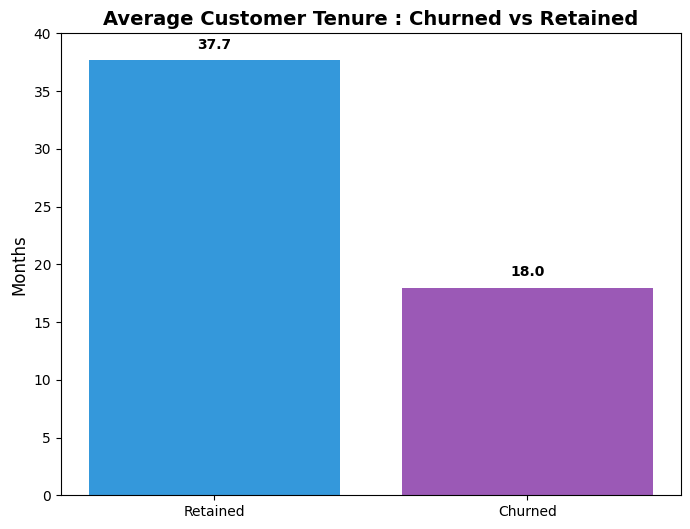

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
bars = plt.bar(['Retained', 'Churned'], [avg_retained_tenure, avg_churned_tenure], color = ['#3498db', '#9b59b6'])
plt.title('Average Customer Tenure : Churned vs Retained', fontsize = 14, fontweight = 'bold')
plt.ylabel('Months', fontsize = 12)
plt.ylim(0, 40)

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}',
             ha='center', fontweight='bold')

plt.savefig('/content/drive/MyDrive/customer_churn_analysis/images/tenure_comparision.png', dpi = 150, bbox_inches = 'tight')
plt.show()

In [ ]:
contract_churn = df.groupby('Contract')['Churn'].mean().sort_values(ascending = False)
contract_churn

print(f'The maximum churn rate is from {contract_churn.idxmax()} contract : {contract_churn.max()*100:.1f}%')

The maximum churn rate is from Month-to-month contract : 42.7%


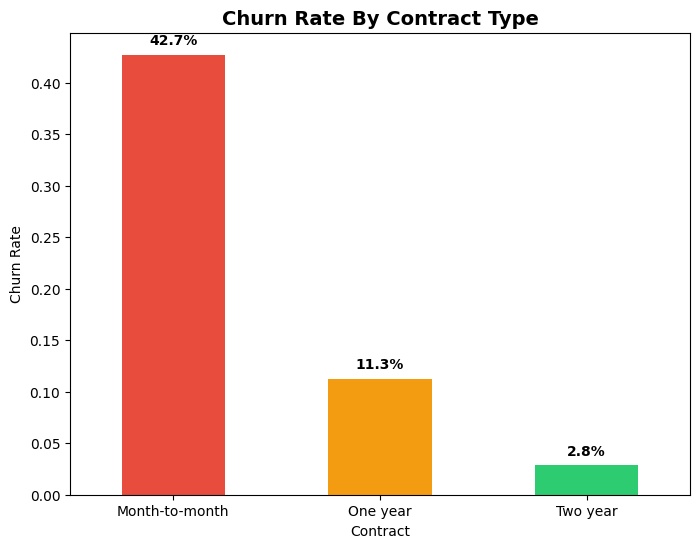

In [ ]:
plt.figure(figsize=(8,6))
bars = contract_churn.plot(kind = 'bar', color=['#e74c3c', '#f39c12', '#2ecc71'])
plt.title('Churn Rate By Contract Type', fontsize = 14, fontweight = 'bold')
plt.ylabel('Churn Rate')
plt.xticks(rotation = 0)

for i, v in enumerate(contract_churn):
  plt.text(i, v + 0.01, f'{v:.1%}', ha = 'center', fontweight = 'bold')

plt.savefig('/content/drive/MyDrive/customer_churn_analysis/images/contract_churn.png', dpi = 150, bbox_inches = 'tight')
plt.show()

In [ ]:
payment_churn = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending = False)
payment_churn

print(f'The maximum churn risk is by {payment_churn.idxmax()} payment menthod : {payment_churn.max():.1%}')

The maximum churn risk is by Electronic check payment menthod : 45.3%


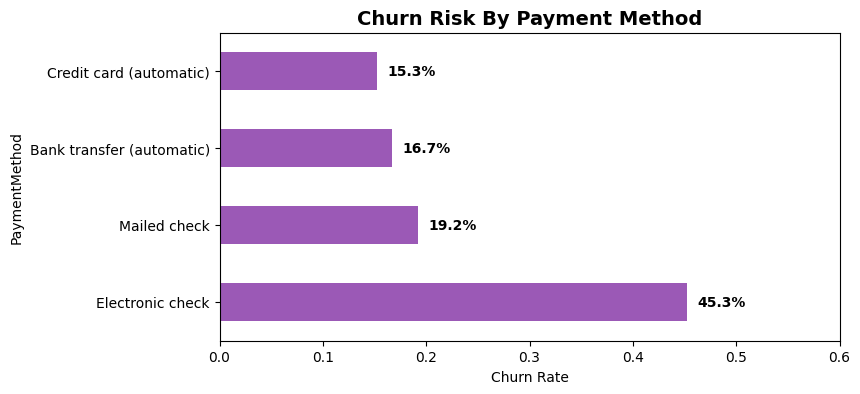

In [ ]:
plt.figure(figsize = (8, 4))
bars = payment_churn.plot(kind = 'barh', color = '#9b59b6')
plt.title('Churn Risk By Payment Method', fontsize = 14, fontweight = 'bold')
plt.xlabel('Churn Rate')
plt.xlim(0, 0.6)

for i, v in enumerate(payment_churn):
  plt.text( v + 0.01, i , f'{v:.1%}', va = 'center', fontweight = 'bold')

plt.savefig('/content/drive/MyDrive/customer_churn_analysis/images/payment_churn.png', dpi = 150, bbox_inches = 'tight')
plt.show()


In [ ]:
high_risk = df[
    (df['Contract'] == 'Month-to-month')&
    (df['PaymentMethod'] == 'Electronic check')&
    (df['tenure'] <= 12)
]

risk_churn_rate = high_risk['Churn'].mean()
total_churn_rate = df['Churn'].mean()

print(f'High-Risk Segment Churn : {risk_churn_rate:.1%}')
print(f'Overall Churn : {total_churn_rate:.1%}')
print(f'High-risk group is {risk_churn_rate/total_churn_rate:.1f}x is more likely to churn')

High-Risk Segment Churn : 63.1%
Overall Churn : 26.6%
High-risk group is 2.4x is more likely to churn


## ✅ Recommendation

**🎯 Target Customers**
- Month-to-month contract users  
- Paying via electronic check  
- Tenure less than 12 months  

**💡 Action Plan**
Offer a **1-year contract with a 15% discount** incentive.  

**📈 Expected Impact**
- Reduce churn rate in high-risk group from **63% → ~40%**  
- **Save approximately $120K/month** in lost revenue  
  *(Assuming 70 Average Revenue Per User — ARPU)*
